In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizkirezapratama","key":"01e800a1fc255c66bb74e762b1cc746d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 97% 517M/534M [00:02<00:00, 211MB/s]
100% 534M/534M [00:02<00:00, 204MB/s]


In [5]:
!mkdir vgtbles
!unzip -qq vegetable-image-dataset.zip -d vgtbles
!ls vgtbles

'Vegetable Images'


In [11]:
!ls vgtbles/Vegetable\ Images/train/

Bean	      Brinjal	Capsicum     Cucumber  Pumpkin
Bitter_Gourd  Broccoli	Carrot	     Papaya    Radish
Bottle_Gourd  Cabbage	Cauliflower  Potato    Tomato


In [12]:
import os

vgtbles = os.path.join('/content/vgtbles/Vegetable Images/train/')

print(os.listdir(vgtbles))

['Tomato', 'Bottle_Gourd', 'Papaya', 'Capsicum', 'Radish', 'Cabbage', 'Pumpkin', 'Broccoli', 'Brinjal', 'Bitter_Gourd', 'Bean', 'Cauliflower', 'Carrot', 'Potato', 'Cucumber']


In [13]:
import shutil

ignore_vgtbles = ['Radish', 'Cabbage', 'Pumpkin', 'Broccoli', 'Brinjal', 'Bitter_Gourd', 'Bean', 'Cauliflower', 'Carrot', 'Potato', 'Cucumber']

for x in ignore_vgtbles:
  path = os.path.join(vgtbles, x)
  shutil.rmtree(path)

In [14]:
list_vgtbles = os.listdir(vgtbles)
print(list_vgtbles)

['Tomato', 'Bottle_Gourd', 'Papaya', 'Capsicum']


In [15]:
from PIL import Image
total = 0

for x in list_vgtbles:
  dir = os.path.join(vgtbles, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

Tomato: 1000
- (224, 224)
- (224, 224)
- (224, 224)
- (224, 224)
---------------
Bottle_Gourd: 1000
- (224, 224)
- (224, 224)
- (224, 224)
- (224, 224)
---------------
Papaya: 1000
- (224, 224)
- (224, 224)
- (224, 224)
- (224, 224)
---------------
Capsicum: 1000
- (224, 224)
- (224, 224)
- (224, 224)
- (224, 224)
---------------

Total : 4000


<function matplotlib.pyplot.show(*args, **kw)>

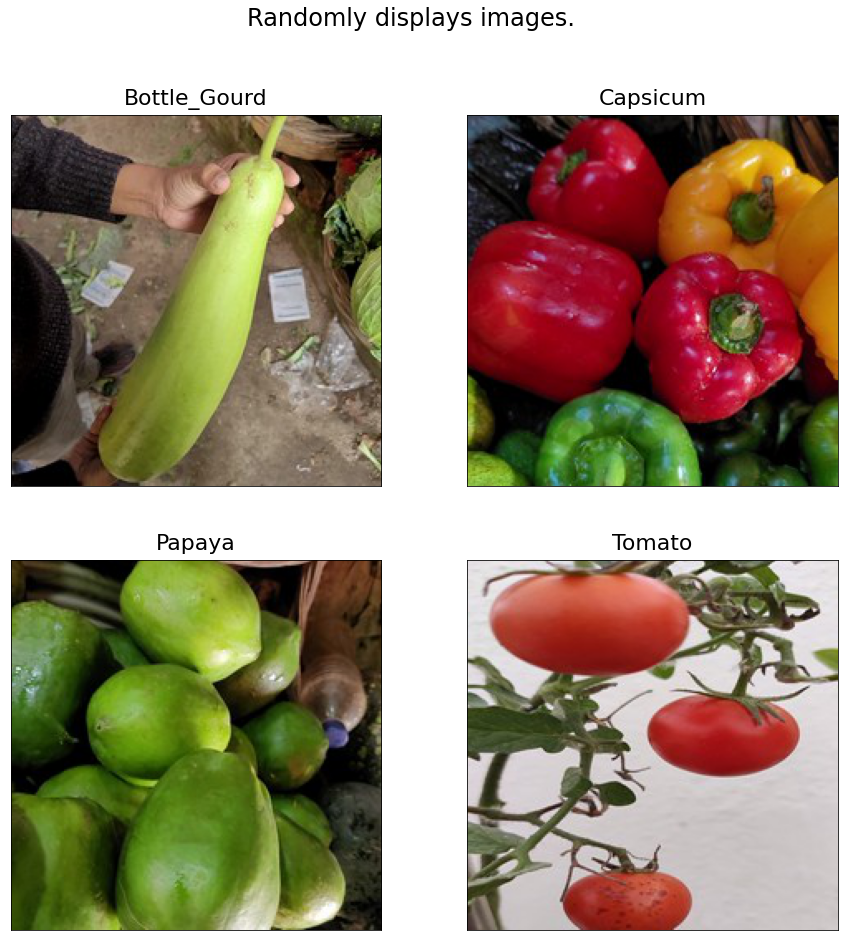

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Randomly displays images.", fontsize=24)
vgtbles_sorted = sorted(list_vgtbles)
vgtbles_id = 0
for i in range(2):
  for j in range(2):
    try:
      vgtbles_selected = vgtbles_sorted[vgtbles_id] 
      vgtbles_id += 1
    except:
      break
    if vgtbles_selected == '.TEMP':
        continue
    vgtbles_selected_images = os.listdir(os.path.join(vgtbles, vgtbles_selected))
    vgtbles_selected_random = np.random.choice(vgtbles_selected_images)
    img = plt.imread(os.path.join(vgtbles, vgtbles_selected, vgtbles_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(vgtbles_selected, pad=10, fontsize=22)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [19]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    vgtbles,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    vgtbles, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.82 and logs.get('val_accuracy')>0.82):
      print("\nAccuracy above 82%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [22]:
with tf.device("/device:GPU:0"):
  history = model.fit(data_train, 
                    epochs = 20, 
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val, 
                    validation_steps = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/20
12/12 [==============================] - 267s 22s/step - loss: 1.2228 - accuracy: 0.4440 - val_loss: 0.8970 - val_accuracy: 0.5990
Epoch 2/20
12/12 [==============================] - 249s 20s/step - loss: 0.8016 - accuracy: 0.6647 - val_loss: 0.6672 - val_accuracy: 0.7148
Epoch 3/20
12/12 [==============================] - 260s 22s/step - loss: 0.6264 - accuracy: 0.7295 - val_loss: 0.5756 - val_accuracy: 0.7292
Epoch 4/20
12/12 [==============================] - 243s 20s/step - loss: 0.5073 - accuracy: 0.7779 - val_loss: 0.4468 - val_accuracy: 0.7995
Epoch 5/20
12/12 [==============================] - 244s 20s/step - loss: 0.4802 - accuracy: 0.8050 - val_loss: 0.3955 - val_accuracy: 0.8359
Epoch 6/20
12/12 [==============================] - ETA: 0s - loss: 0.3860 - accuracy: 0.8465 
Accuracy above 82%, finish training!
12/12 [==============================] - 243s 20s/step - loss: 0.3860 - accuracy: 0.8465 - val_loss: 0.3189 - val_accuracy: 0.8594


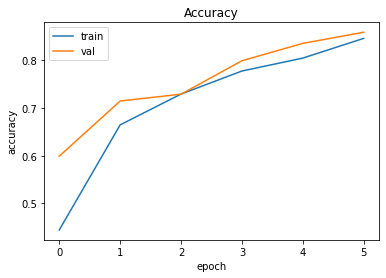

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

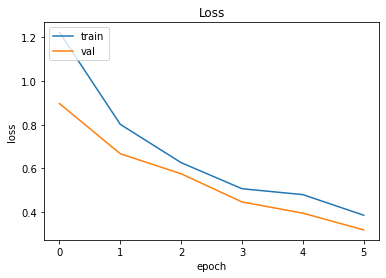

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)